### Aplicação de modelos de aprendizado de máquina não supervisionado para base de dados de licitações públicas
### Autor: Eduardo P. Lima

Esse notebook apresenta técnicas de aprendizado de máquina em um dataset de licitações públicas realizadas por órgãos
do estado do Rio Grande do Norte. 

O conjunto de dados adquirido possui os seguintes atributos:

* esfera: esfera do ente que realizou a licitação (M - municipal, E - estadual)
* modalidade_licitação: modalidade da licitação realizada ('SRP - RDC', 'CREDENCIAMENTO - CHAMAMENTO PÚBLICO',
       'PREGÃO ELETRÔNICO ', 'CONCORRÊNCIA PRESENCIAL',
       'TOMADA DE PREÇOS', 'SRP - PREGÃO ELETRÔNICO', 'PREGÃO PRESENCIAL',
       'SRP - PREGÃO PRESENCIAL', 'CHAMADA PÚBLICA - OUTROS',
       'SISTEMA DE REGISTRO DE PREÇO', 'PUBLICIDADE - CONCORRÊNCIA',
       'CONVITE', 'CHAMADA PÚBLICA - ALIMENTAÇÃO ESCOLAR',
       'SRP - CONCORRÊNCIA', 'ABERTO', 'PUBLICIDADE - TOMADA DE PREÇOS',
       'FECHADO', 'RDC ELETRÔNICO - ABERTO', 'CONCORRÊNCIA ELETRÔNICA',
       'RDC PRESENCIAL - ABERTO')
* classificacao_objeto: tipo de objeto licitado ('SERVIÇO - OUTROS', 'LOCAÇÃO DE IMÓVEIS', 'OUTRO (ESPECIFICAR)',
       'COMPRA - MATERIAL PERMANENTE', 'COMPRA - MATERIAL DE CONSUMO',
       'OBRA', 'SERVIÇO DE PUBLICIDADE',
       'SERVIÇO DE NATUREZA CONTÍNUA (EXCETO ENGENHARIA)', 'CONCESSÃO',
       'UTILIZAÇÃO DE PROGRAMA DE INFORMÁTICA', 'SERVIÇO DE CONSULTORIA',
       'LOCAÇÃO - OUTROS', 'LOCAÇÃO DE EQUIPAMENTOS',
       'SERVIÇO DE ENGENHARIA', 'CESSÃO DE DIREITOS',
       'AQUISIÇÃO DE BENS IMÓVEIS', 'ALIENAÇÃO DE BENS MÓVEIS',
       'ALIENAÇÃO DE BENS IMÓVEIS',
       'SERVIÇO DE ORGANIZAÇÃO DE CONCURSO PÚBLICO', 'PERMISSÃO')
* ano: ano de realização do procedimento licitatório
* semana_publicacao: semana do ano em que foi realizado o certame
* total_orcado: total orçado para a licitação, em reais
* total_pago: total efetivamente pago no curso do contrato resultante da licitação, em reais
* total_pagamentos_licitante: total que o licitante vencedor da licitação já recebeu do mesmo ente em todas as licitações que venceu, em reais
* max_pagamento_licitante: maior pagamento já realizado pelo órgão favorecendo o licitante, em reais
* quantidade_licitacoes_licitante: quantidade de procedimentos que o licitante já venceu no mesmo órgão





#### 1. Configuração do ambiente

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_excel('dataset.xlsx')

In [35]:
df.classificacao_objeto.unique()

array(['SERVIÇO - OUTROS', 'LOCAÇÃO DE IMÓVEIS', 'OUTRO (ESPECIFICAR)',
       'COMPRA - MATERIAL PERMANENTE', 'COMPRA - MATERIAL DE CONSUMO',
       'OBRA', 'SERVIÇO DE PUBLICIDADE',
       'SERVIÇO DE NATUREZA CONTÍNUA (EXCETO ENGENHARIA)', 'CONCESSÃO',
       'UTILIZAÇÃO DE PROGRAMA DE INFORMÁTICA', 'SERVIÇO DE CONSULTORIA',
       'LOCAÇÃO - OUTROS', 'LOCAÇÃO DE EQUIPAMENTOS',
       'SERVIÇO DE ENGENHARIA', 'CESSÃO DE DIREITOS',
       'AQUISIÇÃO DE BENS IMÓVEIS', 'ALIENAÇÃO DE BENS MÓVEIS',
       'ALIENAÇÃO DE BENS IMÓVEIS',
       'SERVIÇO DE ORGANIZAÇÃO DE CONCURSO PÚBLICO', 'PERMISSÃO'],
      dtype=object)

#### 2. Análise exploratória dos dados

In [26]:
df.head()

,esfera,modalidade_licitacao,classificacao_objeto,ano,semana_publicacao,semanas_pagamentos,total_orcado,total_pago,total_pagamentos_licitante,max_pagamento_licitante,quantidade_licitacoes_licitante
0,M,SRP - RDC,SERVIÇO - OUTROS,2021,37,140,40000.0,18295.60,66168.00,2500.0,2
1,E,NaN,SERVIÇO - OUTROS,2023,11,248,1620.0,3596.31,3596.31,135.0,1
2,M,NaN,LOCAÇÃO DE IMÓVEIS,2023,43,305,79800.0,625100.00,625100.00,6650.0,1
3,E,CREDENCIAMENTO - CHAMAMENTO PÚBLICO,SERVIÇO - OUTROS,2021,12,90,9875.0,18575.00,18575.00,9875.0,1
4,M,NaN,SERVIÇO - OUTROS,2021,5,63,5000.0,12575.00,52064.17,1350.0,4


<Axes: xlabel='modalidade_licitacao'>

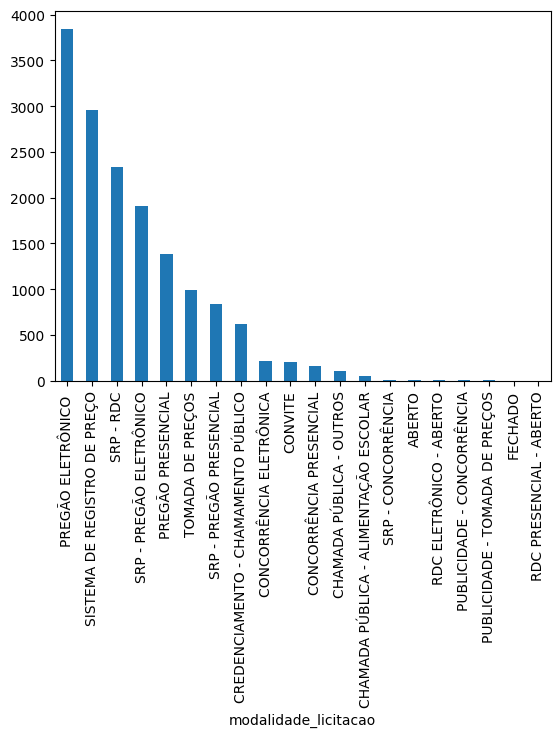

In [27]:
df.modalidade_licitacao.value_counts().plot(kind='bar')

<Axes: xlabel='classificacao_objeto'>

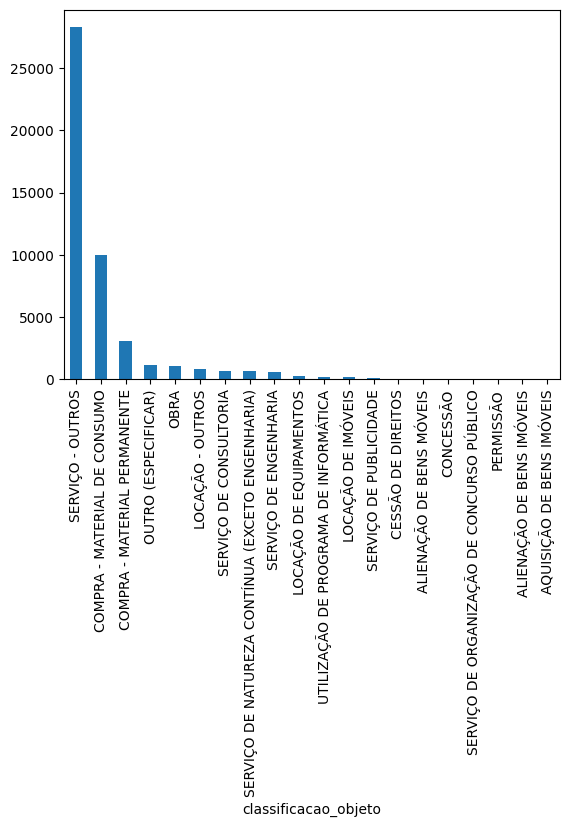

In [28]:
df.classificacao_objeto.value_counts().plot(kind='bar')

<Axes: xlabel='ano'>

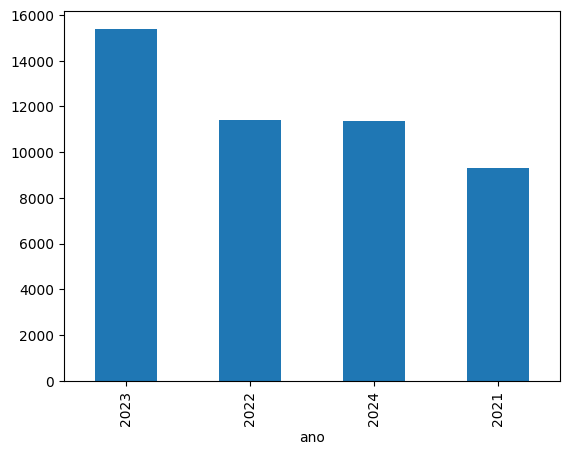

In [29]:
df.ano.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

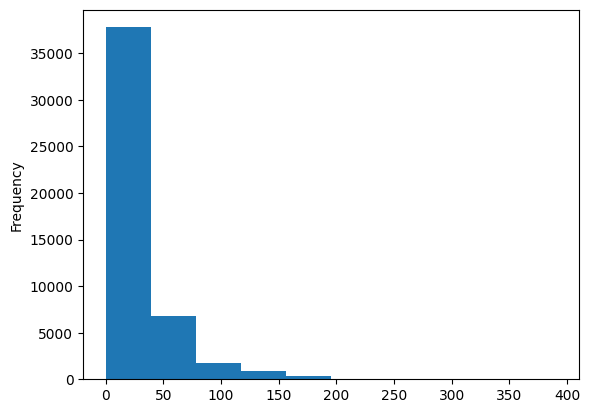

In [31]:
df.semanas_pagamentos.plot(kind='hist')

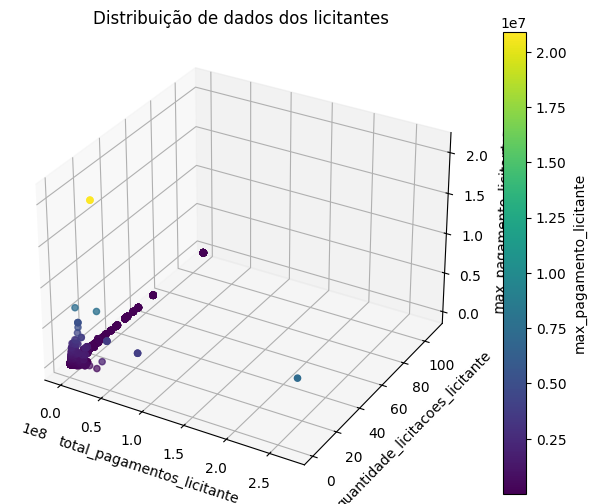

In [47]:
x = df['total_pagamentos_licitante']
y = df['quantidade_licitacoes_licitante']
z = df['max_pagamento_licitante']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('total_pagamentos_licitante')
ax.set_ylabel('quantidade_licitacoes_licitante')
ax.set_zlabel('max_pagamento_licitante')

# Adding a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('max_pagamento_licitante')

plt.title('Distribuição de dados dos licitantes')
plt.show()
